In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Import Modules

In [1]:
# get some important modules
# for data wrangling
import pandas as pd
# for array calculations
import numpy as np 

#for plotting
from matplotlib import pyplot as plt
import seaborn as sns
 
#for Modelling    
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read the Datasets & Merge them

In [23]:
# Read NBA Game Stats for year 2016-17.
NBAPlayerStats = pd.read_csv('/content/drive/My Drive/nbaproject/NBAStats2016-17.csv', index_col = 0)
NBAPlayerStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Alex Abrines,SG,23,OKC,68,6,1055,134,341,0.393,94,247,0.381,40,94,0.426,0.531,44,49,0.898,18,68,86,40,37,8,33,114,406
2,Quincy Acy,PF,26,TOT,38,1,558,70,170,0.412,37,90,0.411,33,80,0.413,0.521,45,60,0.750,20,95,115,18,14,15,21,67,222
3,Steven Adams,C,23,OKC,80,80,2389,374,655,0.571,0,1,0.000,374,654,0.572,0.571,157,257,0.611,281,332,613,86,89,78,146,195,905
4,Arron Afflalo,SG,31,SAC,61,45,1580,185,420,0.440,62,151,0.411,123,269,0.457,0.514,83,93,0.892,9,116,125,78,21,6,42,104,515
5,Alexis Ajinca,C,28,NOP,39,15,584,89,178,0.500,0,4,0.000,89,174,0.511,0.500,29,40,0.725,46,131,177,12,20,22,31,77,207


In [22]:
# Read Salary of NBA Players year 2017.
NBAPlayerSalary = pd.read_csv('/content/drive/My Drive/nbaproject/NBA_season1718_salary.csv', index_col = 0)
NBAPlayerSalary.head()

,Player,Tm,season17_18
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0


In [26]:
# Merge the datasets
NBA = pd.merge(NBAPlayerStats, NBAPlayerSalary, on = 'Player', how = 'left')
NBA.head()
NBA.columns

Index(['Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Tm_y',
       'season17_18'],
      dtype='object')

# Calculate the game stats per game

In [ ]:
NBA['MPG'] = NBA['MP'] / NBA['G']
NBA['ORBG'] = NBA['ORB'] / NBA['G']
NBA['DRBG'] = NBA['DRB'] / NBA['G']
NBA['TRBG'] = NBA['TRB'] / NBA['G']
NBA['ASTG'] = NBA['AST'] / NBA['G']
NBA['STLG'] = NBA['STL'] / NBA['G']
NBA['BLKG'] = NBA['BLK'] / NBA['G']
NBA['TOVG'] = NBA['TOV'] / NBA['G']
NBA['PFG'] = NBA['PF'] / NBA['G']
NBA['PTSG'] = NBA['PTS'] / NBA['G']

# Read the Height and Weight attributes of Players
PlayerHtWt = pd.read_csv('/content/drive/My Drive/nbaproject/datasets_Players.csv', index_col = 0)
PlayerHtWt.head()

# Merge the data with NBA
NBA_final = pd.merge(NBA, PlayerHtWt, how  = 'left', on = 'Player')

#Check for Missing Values

In [10]:
# Check for missing values
NBA_final.columns[NBA_final.isnull().any()]
NBA_final.isnull().sum()

# Impute the null salaries with mean of salaries. 
NBA_final['season17_18'] = NBA_final['season17_18'].fillna(NBA_final['season17_18'].mean())

# read in some data
df = NBA_final.copy()   
print(df.head())

          Player Pos  Age  ...    born         birth_city  birth_state
0   Alex Abrines  SG   23  ...  1993.0  Palma de Mallorca        Spain
1     Quincy Acy  PF   26  ...  1990.0              Tyler        Texas
2   Steven Adams   C   23  ...  1993.0            Rotorua  New Zealand
3  Arron Afflalo  SG   31  ...  1985.0        Los Angeles   California
4  Arron Afflalo  SG   31  ...  1985.0        Los Angeles   California

[5 rows x 47 columns]


#Check variable corelation

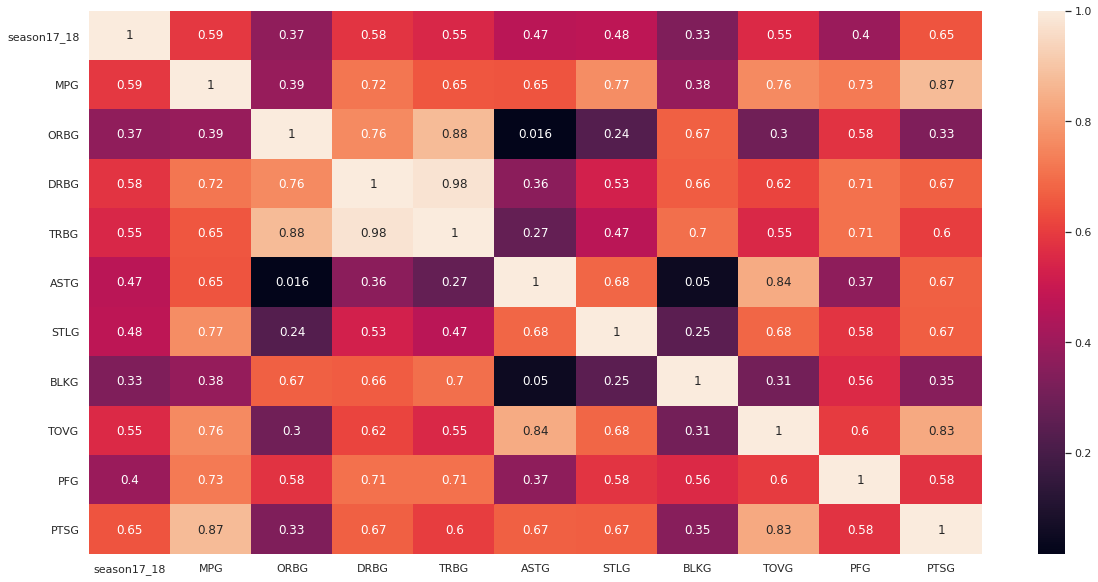

In [13]:


heat_salary1= df[['season17_18','MPG', 'ORBG', 'DRBG', 'TRBG', 'ASTG', 'STLG','BLKG','TOVG', 'PFG','PTSG']]
dfData = heat_salary1.corr() 
fig, ax =  plt.subplots(figsize=(20, 10))
sns.heatmap(dfData, annot = True)
plt.show()

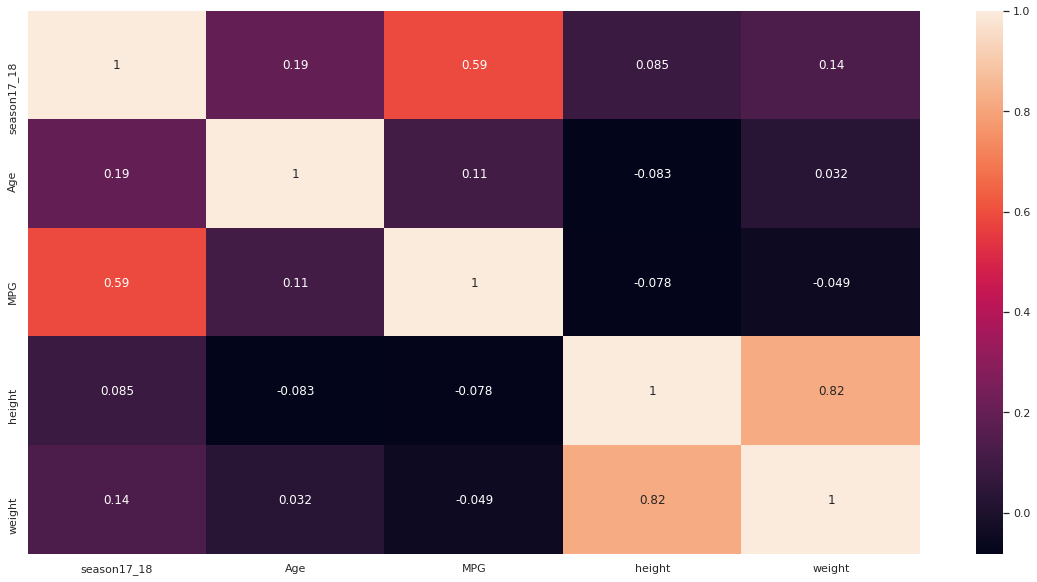

In [14]:

heat_salary2 = df[['season17_18','Pos','Age', 'MPG', 'height', 'weight']]
dfData2 = heat_salary2.corr() 
fig, ax =  plt.subplots(figsize=(20, 10))
sns.heatmap(dfData2, annot = True)
plt.show()

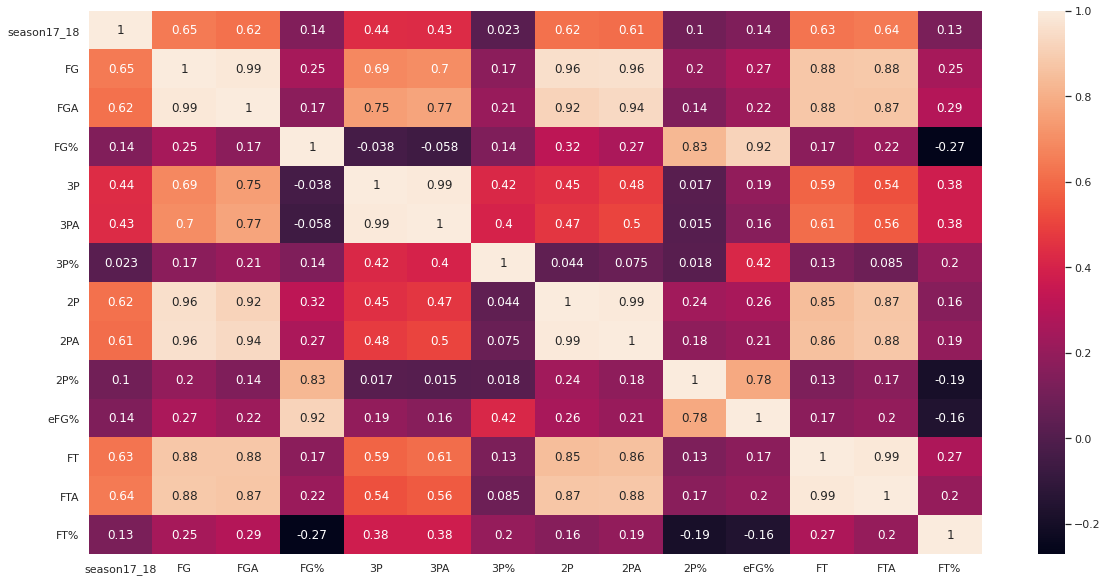

In [15]:
heat_salary3 = df[['season17_18','FG','FGA', 'FG%', '3P', '3PA', '3P%', '2P','2PA','2P%', 'eFG%','FT', 'FTA', 'FT%']]
dfData2 = heat_salary3.corr() 
fig, ax =  plt.subplots(figsize=(20, 10))
sns.heatmap(dfData2, annot = True)
plt.show()

#Modeling

4284352.639885206
0.5579749486296464


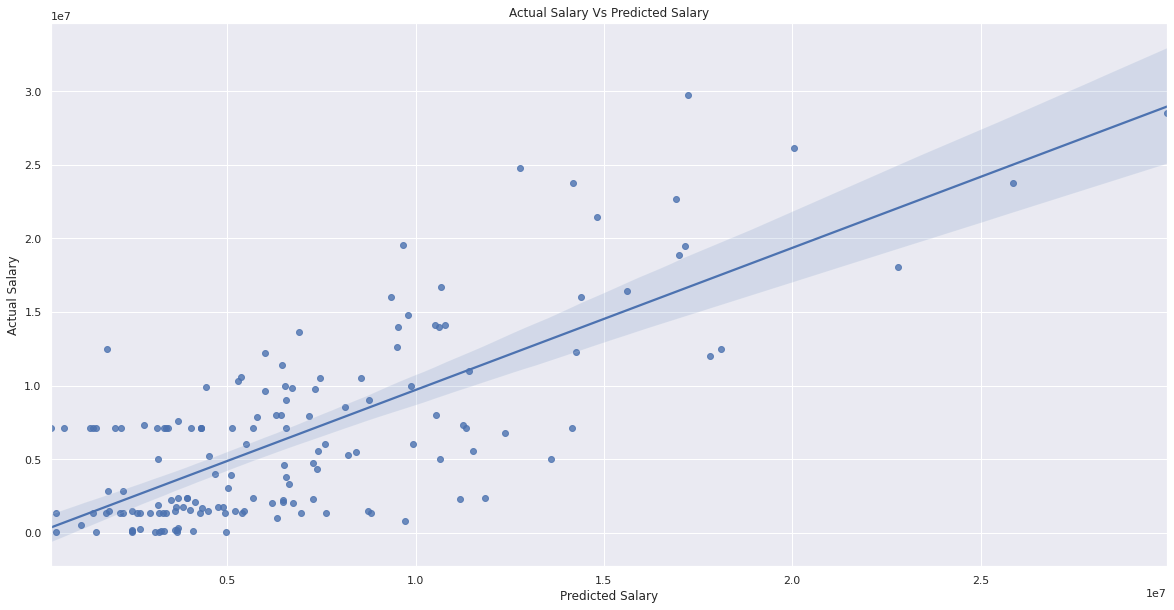

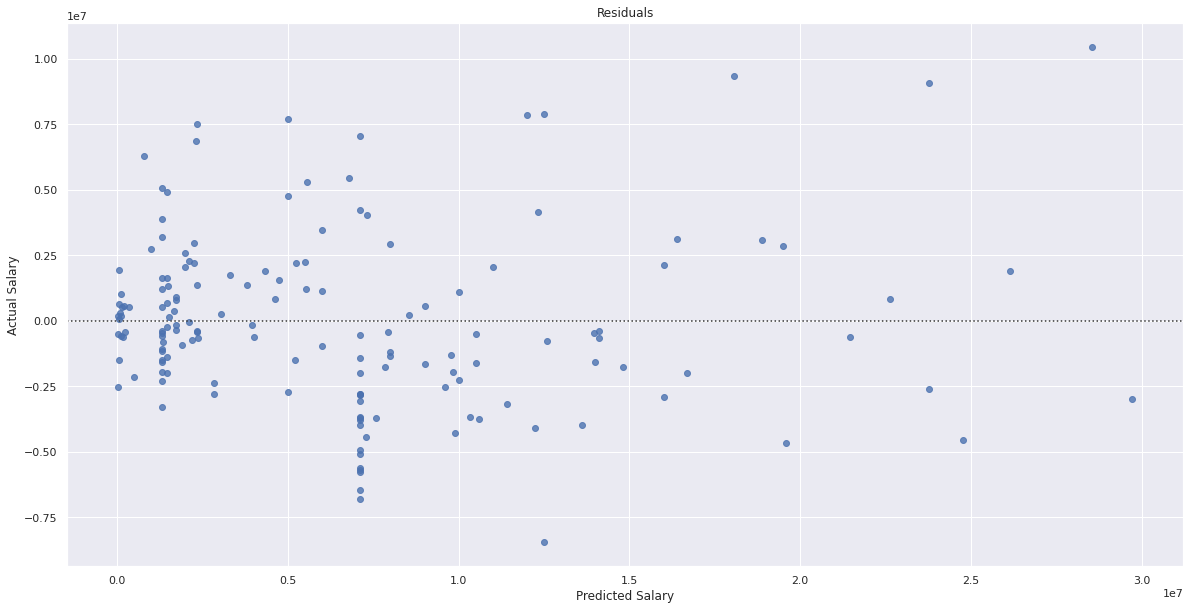

In [16]:

y = df.season17_18
X =  df[['MPG', 'ORBG', 'DRBG', 'TRBG', 'ASTG', 'STLG','BLKG','TOVG', 'PFG','PTSG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))



residual = y_test - y_pred
fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.regplot(y_pred, y_test)
ax.set_title("Actual Salary Vs Predicted Salary")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.residplot(y_test, y_pred)
ax.set_title("Residuals")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

4284352.639885206
0.5579749486296466


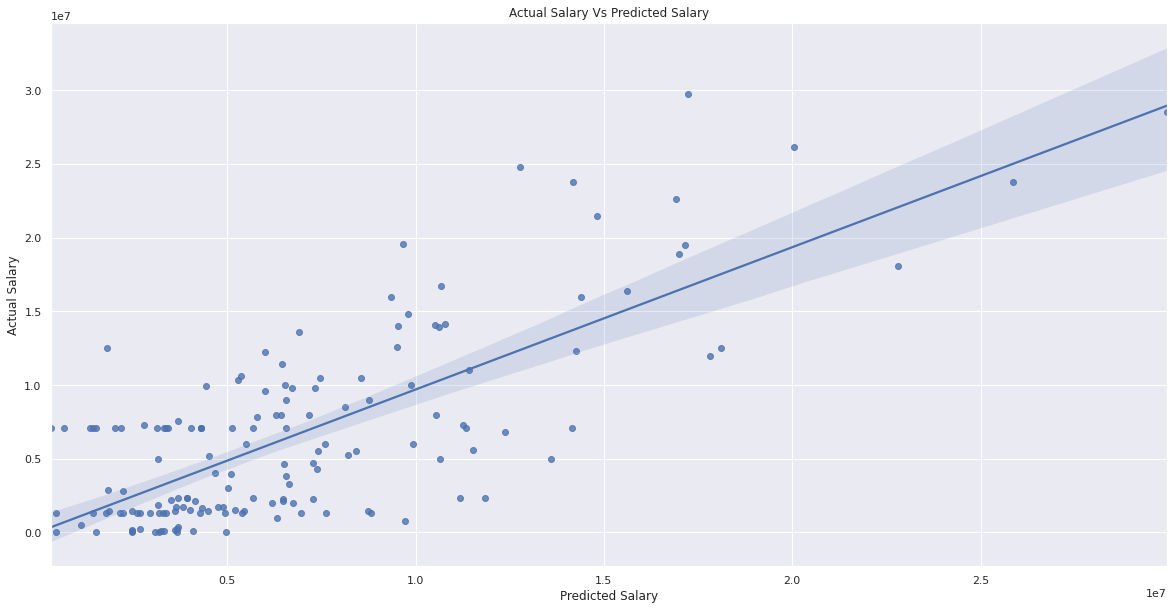

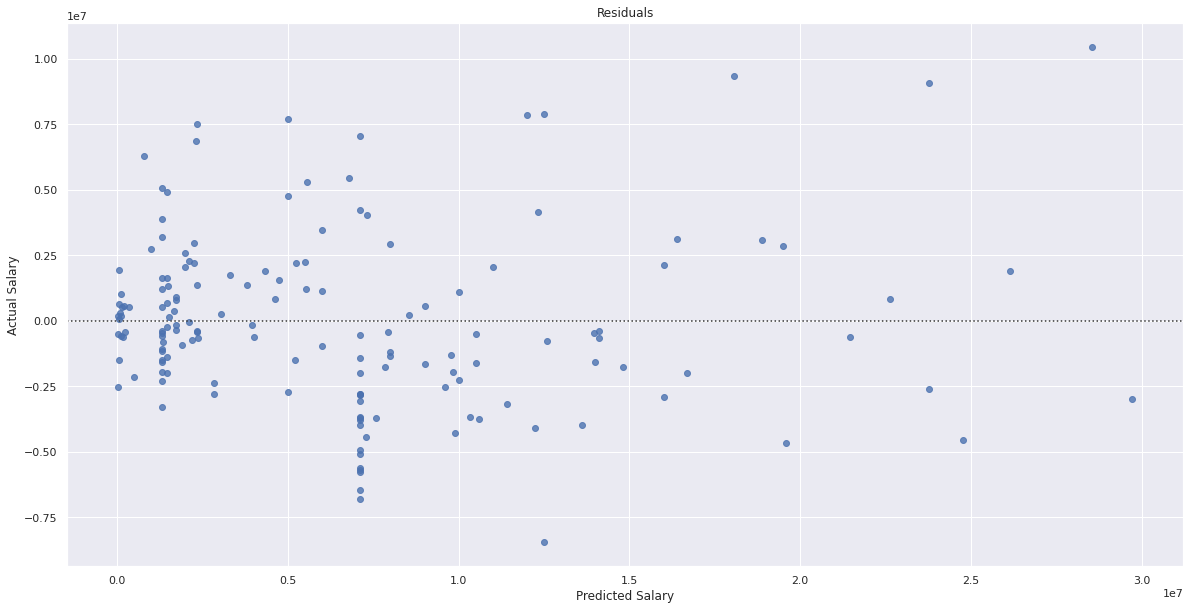

In [17]:
## Model 2
y = df.season17_18
X = df[['MPG', 'ORBG', 'DRBG', 'ASTG', 'STLG','BLKG','TOVG', 'PFG','PTSG']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.regplot(y_pred, y_test)
ax.set_title("Actual Salary Vs Predicted Salary")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.residplot(y_test, y_pred)
ax.set_title("Residuals")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

4269450.790896783
0.5610445069370708


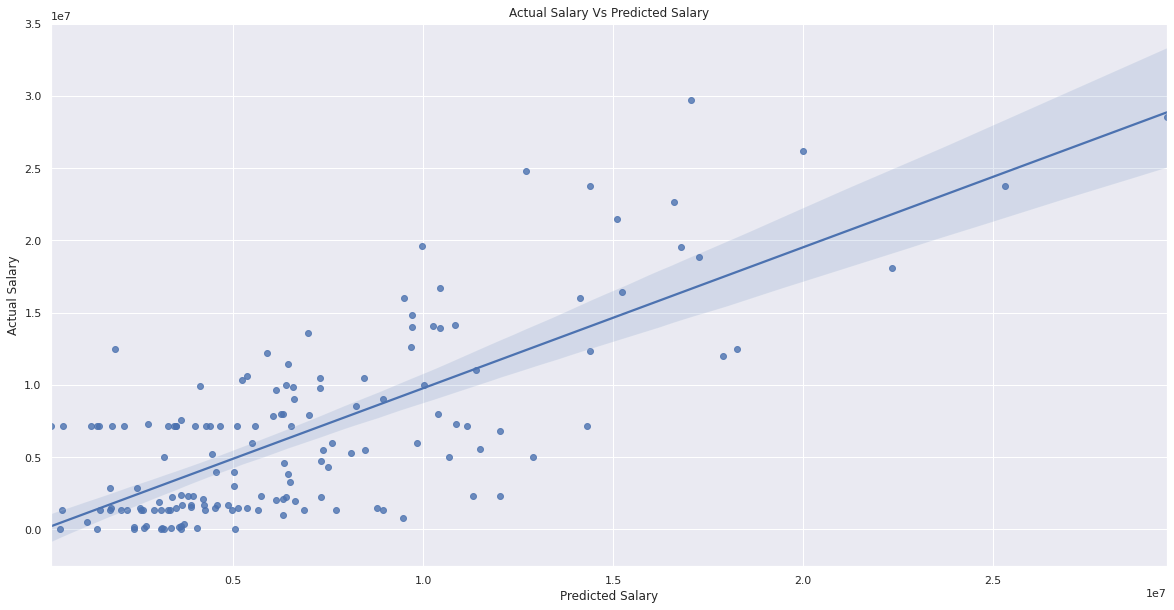

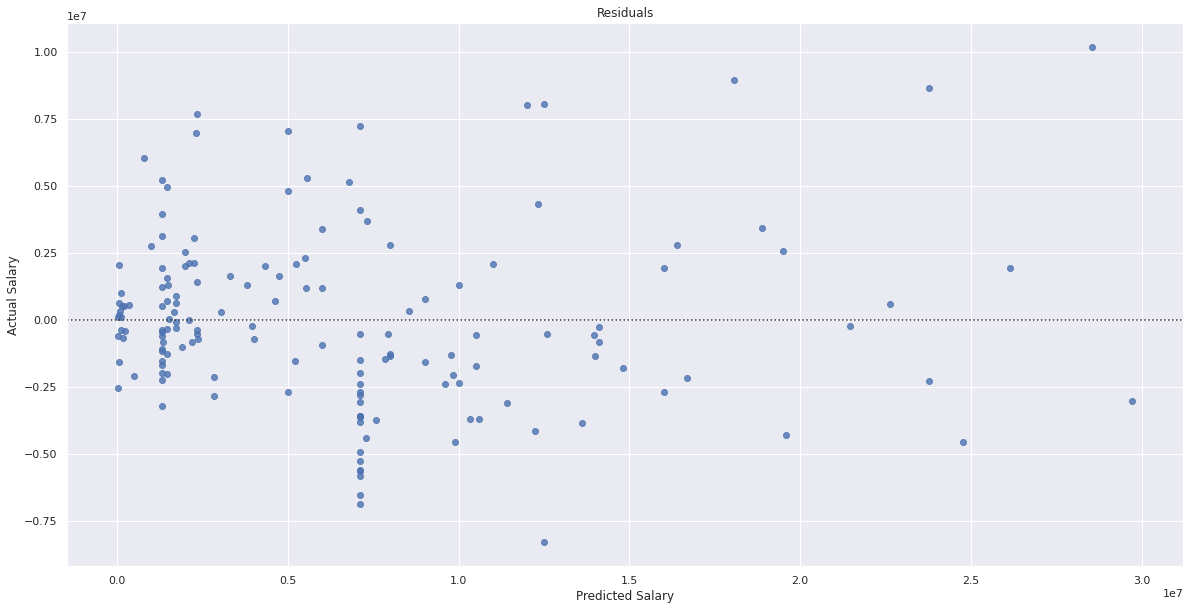

In [18]:
#Model 3
y = df.season17_18
X = df[['MPG', 'TRBG', 'ASTG', 'STLG','BLKG','TOVG', 'PFG','PTSG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

residual = y_test - y_pred
fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.regplot(y_pred, y_test)
ax.set_title("Actual Salary Vs Predicted Salary")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()


fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.residplot(y_test, y_pred)
ax.set_title("Residuals")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

4305325.29855129
0.5536367759708242


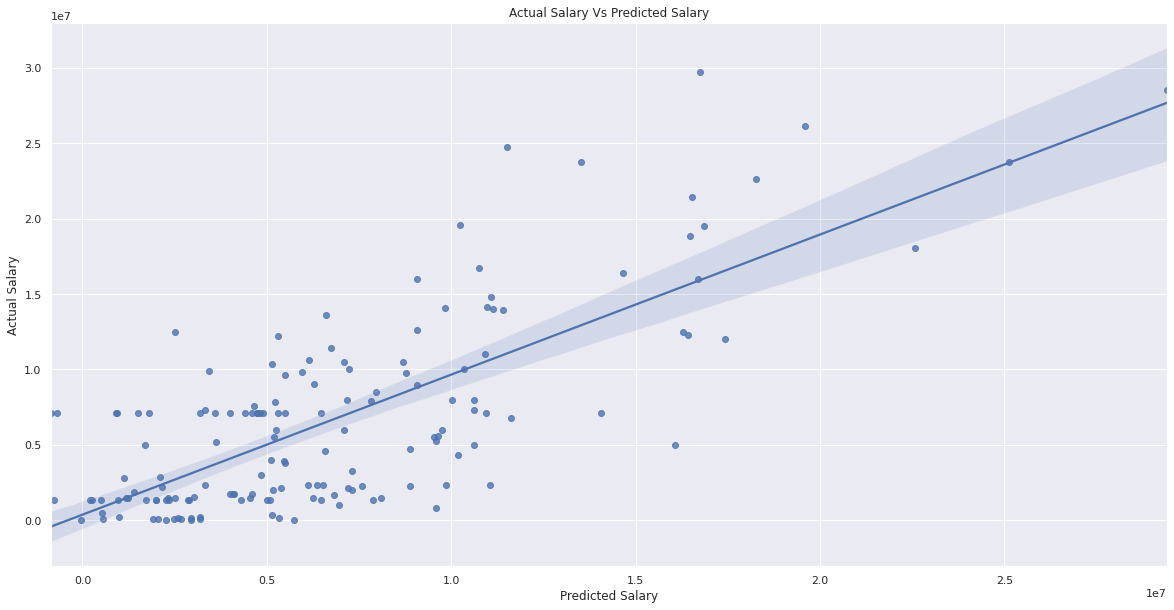

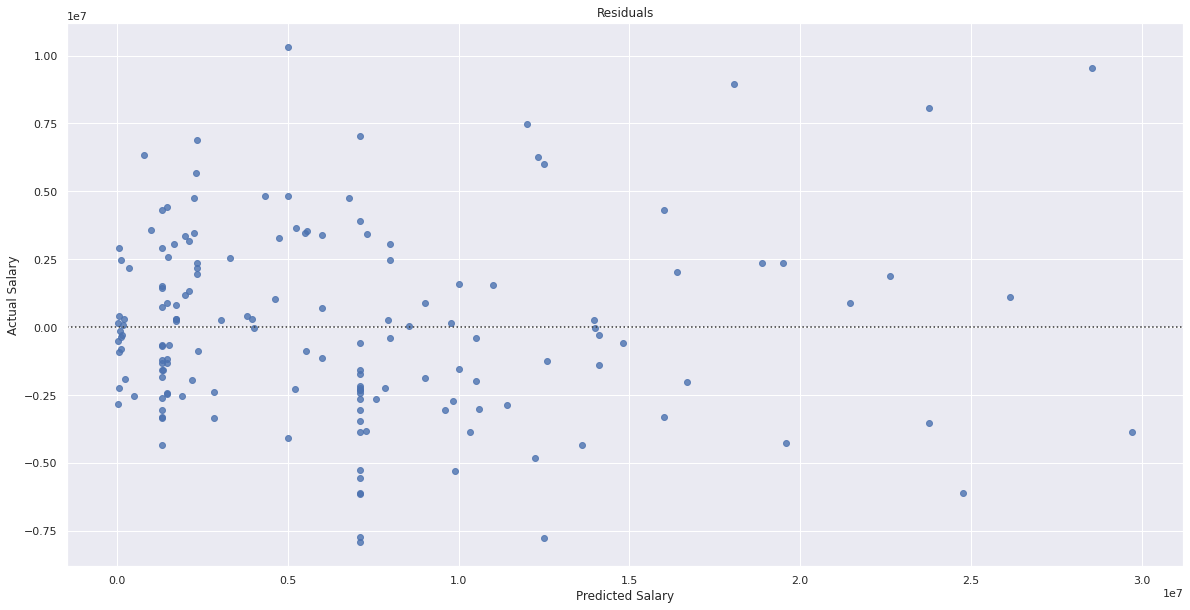

In [19]:
#Model 4
y = df.season17_18
X = df[['MPG', 'TRBG', 'ASTG', 'STLG','BLKG','TOVG', 'PFG','PTSG', 'Age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

residual = y_test - y_pred
fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.regplot(y_pred, y_test)
ax.set_title("Actual Salary Vs Predicted Salary")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.residplot(y_test, y_pred)
ax.set_title("Residuals")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

4555679.164748736
0.5002155658776037


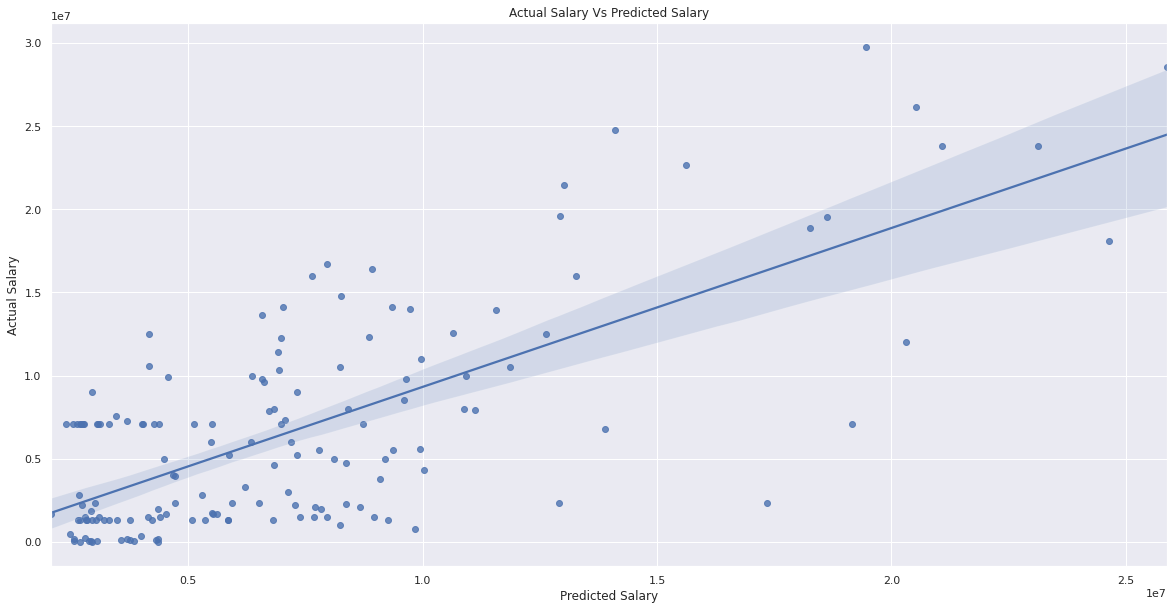

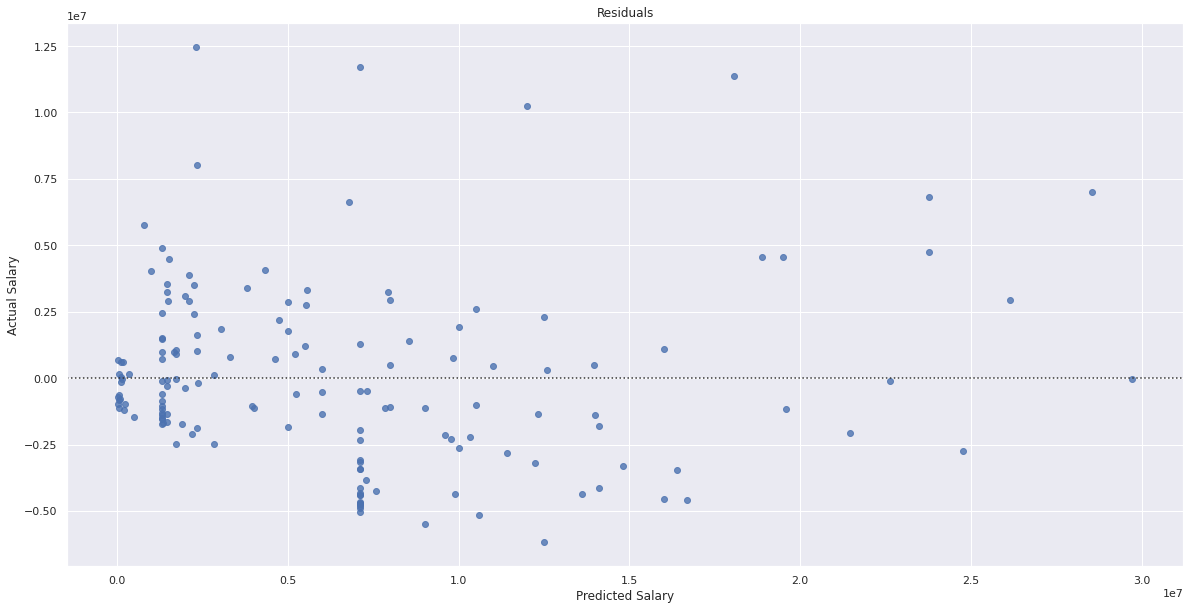

In [20]:
#Model 5

y = df.season17_18
X = df[['FG','FGA','3P', '3PA', '2P','2PA','FT', 'FTA']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_pred = reg.predict(X_test_std)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))


residual = y_test - y_pred
fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.regplot(y_pred, y_test)
ax.set_title("Actual Salary Vs Predicted Salary")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()

fig, ax =  plt.subplots(figsize=(20, 10),)
sns.set(color_codes = True )
ax = sns.residplot(y_test, y_pred)
ax.set_title("Residuals")
ax.set_xlabel("Predicted Salary")
ax.set_ylabel("Actual Salary")
plt.show()